In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def left_term(u,r,q):
    output = np.zeros(len(u))
    for i, u_curr in enumerate(u):
        output[i] = (r*(1-u_curr/q))
    return output

In [4]:
def right_term(u,r,q):
	output = np.zeros(len(u))
	for i, u_curr in enumerate(u):
		output[i]= u_curr/(1+u_curr**2)
	return output

In [5]:
def dudt(u,r,q):
    output = np.zeros(len(u))
    for i, u_curr in enumerate(u):
        output[i] = r*u_curr*(1-u_curr/q)-u_curr**2/(1+u_curr**2)
    return output

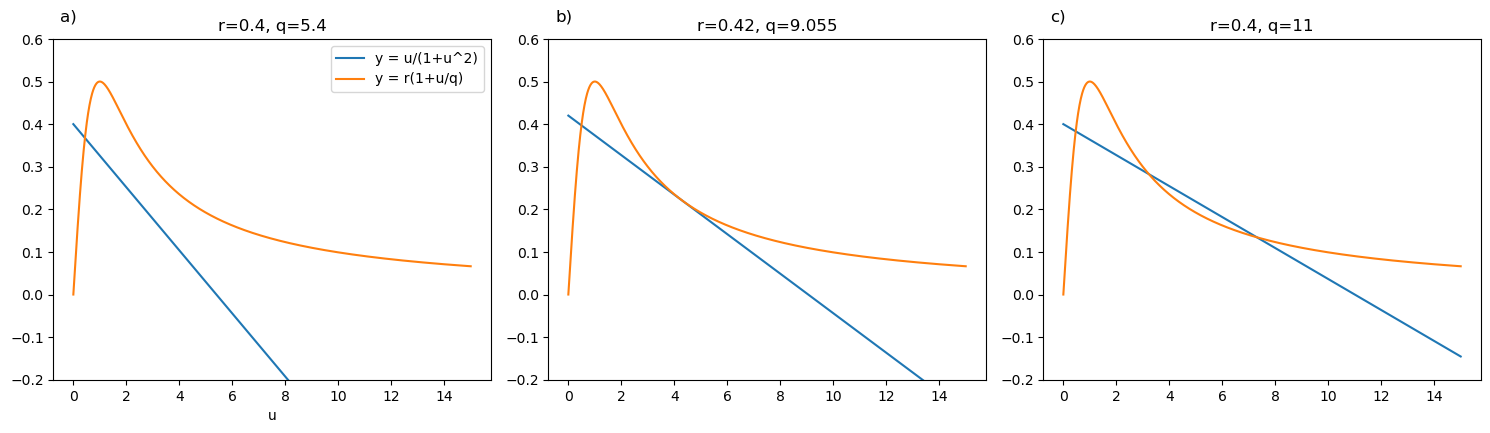

In [23]:
fig1, axs1 = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig1.tight_layout()
fig1.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

subfig_lab = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
x = [-0.5, -0.3]
y = [0.64, 0.30]

r = [0.4, 0.42, 0.4]
q = [5.4, 9.055, 11]

u = np.arange(0, 15.01, 0.01)
u2 = np.arange(-1, 10.01, 0.01)


for i in range(3):
    axs1[i].plot(u, left_term(u,r[i],q[i]), label='y = u/(1+u^2)')
    axs1[i].plot(u, right_term(u,r[i],q[i]), label='y = r(1+u/q)')
    axs1[i].set_ylim([-0.2, 0.6])
    axs1[i].set_title(f'r={r[i]}, q={q[i]}')
    axs1[i].text(x[0], y[0], subfig_lab[i], fontsize=12)

axs1[0].set_xlabel('u')
axs1[0].legend(loc='upper right')

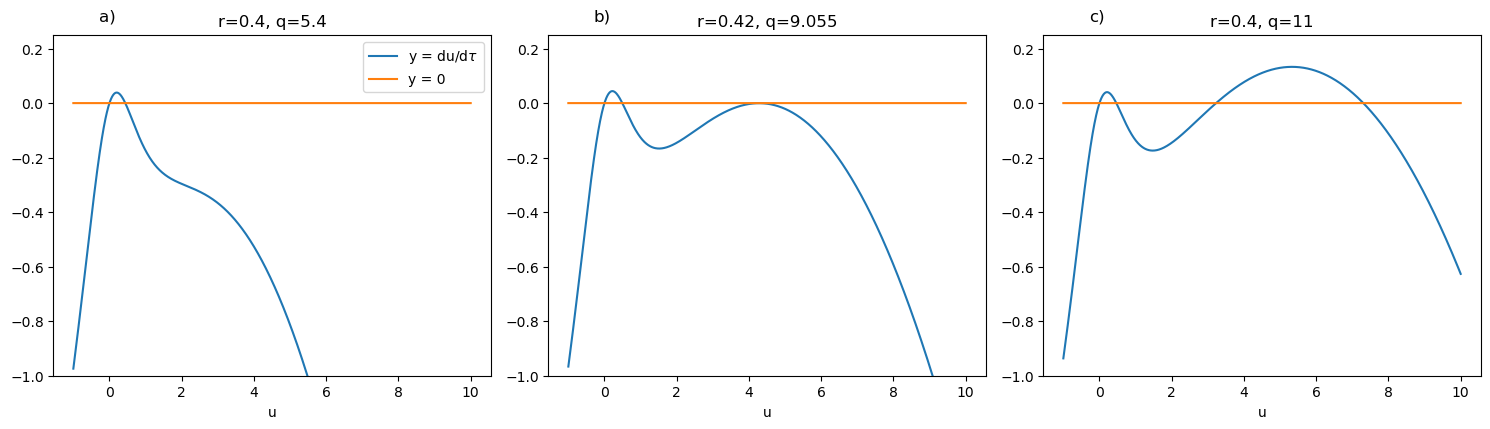

In [24]:
fig2, axs2 = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig2.tight_layout()
fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

for i in range(3):
    axs2[i].plot(u2, dudt(u2,r[i],q[i]),label='y = du/d$\\tau$')
    axs2[i].plot(u2, np.zeros(len(u2)),label='y = 0')
    axs2[i].set_title(f'r={r[i]}, q={q[i]}')
    axs2[i].set_ylim([-1, 0.25])
    axs2[i].set_xlabel('u')
    axs2[i].text(x[1], y[1], subfig_lab[i], fontsize=12)

axs2[0].legend()